# I. Image processing and scikit-image

     1.visualising images: RGB vs grayscale

In [136]:
from skimage import data
import matplotlib.pyplot as plt

In [137]:
def show_image(image, title="Image", cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [138]:
coffee_image = data.coffee()
coins_image = data.coins()

In [139]:
coffee_image.shape

(400, 600, 3)

In [140]:
coins_image.shape

(303, 384)

    2.RGB to grayscale

In [141]:
from skimage import color

In [142]:
rocket = data.rocket()

In [143]:
gray_scaled_rocket = color.rgb2gray(rocket)

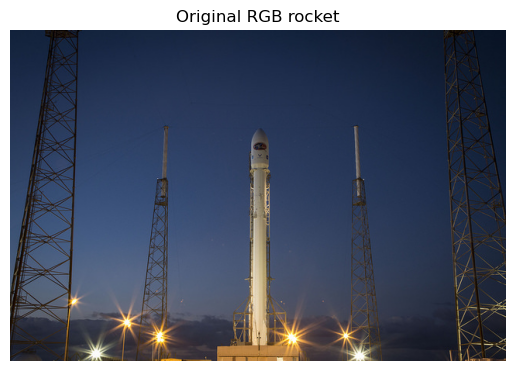

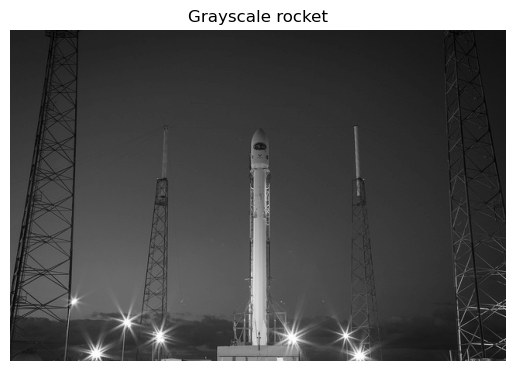

In [144]:
show_image(rocket, 'Original RGB rocket')
show_image(gray_scaled_rocket, 'Grayscale rocket')

# II. Numpy for image
    1. Flipping out

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
#from PIL import Image

Load the image using matplotlib's imread function

In [146]:
sevilleup = pyplot.imread("sevilleup.jpg")
#sevilleup = Image.open("sevilleup.jpg")

Numpy to flip

In [147]:

vertically_flipped = np.flipud(sevilleup)
#################
horizontally_flipped=np.fliplr(vertically_flipped)


Show

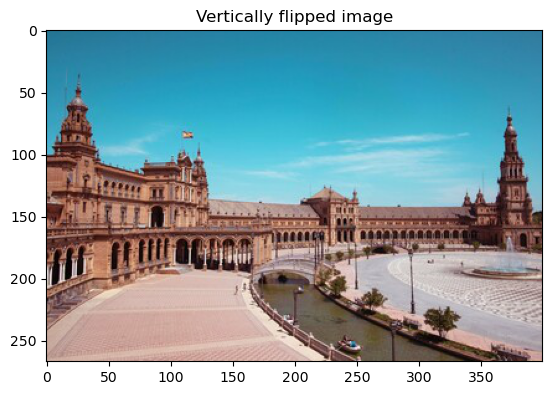

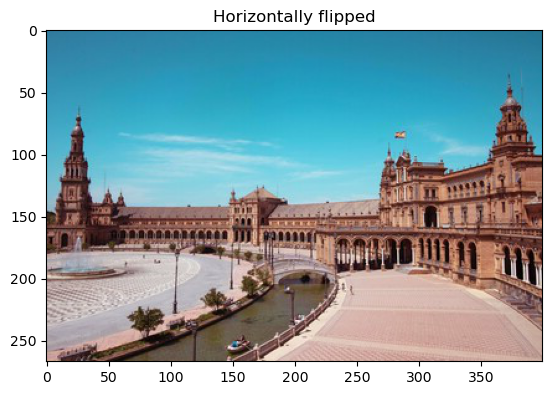

In [148]:
plt.imshow(vertically_flipped)
plt.title("Vertically flipped image")
plt.show()
#########################
plt.imshow(horizontally_flipped)
plt.title("Horizontally flipped")
plt.show()

    2.Histograms

In [149]:
image = pyplot.imread("tofla.png")

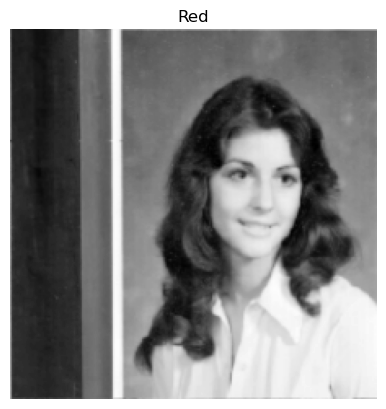

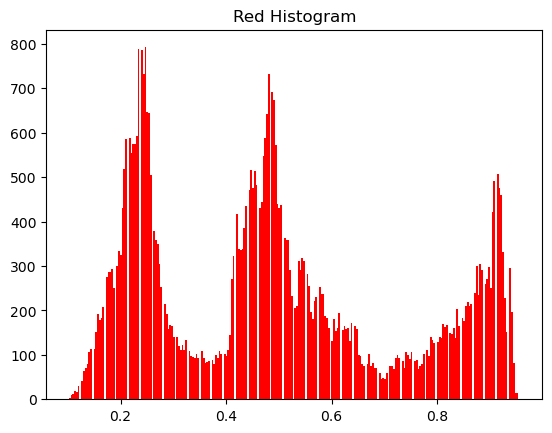

In [150]:
red = image[:, :, 0]
plt.imshow(red, cmap="gray")
plt.title('Red')
plt.axis('off')
plt.show()
######histogram############
plt.hist(red.ravel(), bins=256, color='red');
plt.title('Red Histogram');

Trying the green and the blue as well

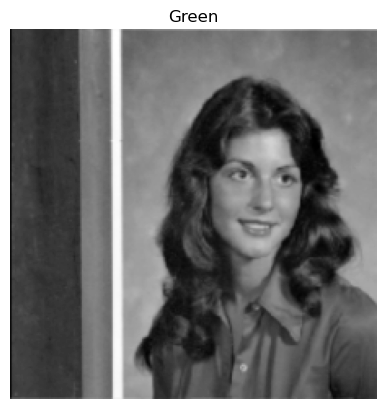

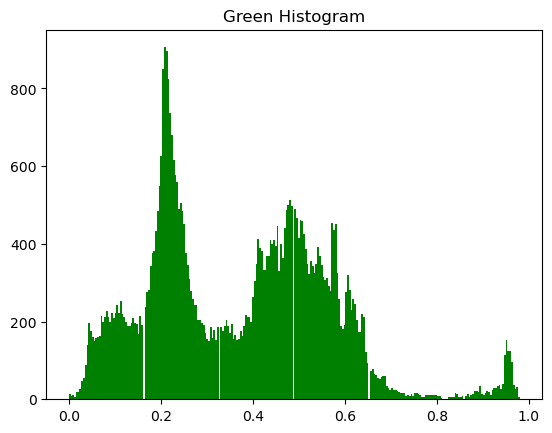

In [151]:
green = image[:, :, 1]
plt.imshow(green, cmap="gray")
plt.title('Green')
plt.axis('off')
plt.show()
######histogram############
plt.hist(green.ravel(), bins=256, color='green');
plt.title('Green Histogram');

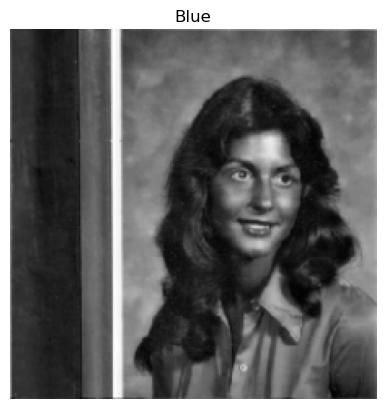

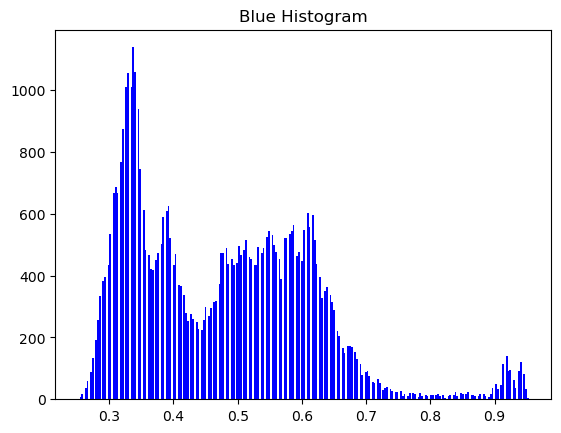

In [152]:
blue = image[:, :, 2]
plt.imshow(blue, cmap="gray")
plt.title('Blue')
plt.axis('off')
plt.show()
######histogram############
plt.hist(blue.ravel(), bins=256, color='blue');
plt.title('Blue Histogram');

# III.Thresholding
    1.Apply global thresholding

In [153]:
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

In [154]:
#import the original img
chess= plt.imread("chess.jpg")
#convert the original img to a gray one
g_chess= color.rgb2gray(chess)
# then to binary
thresh = threshold_otsu(g_chess)
binary_chess = g_chess > thresh

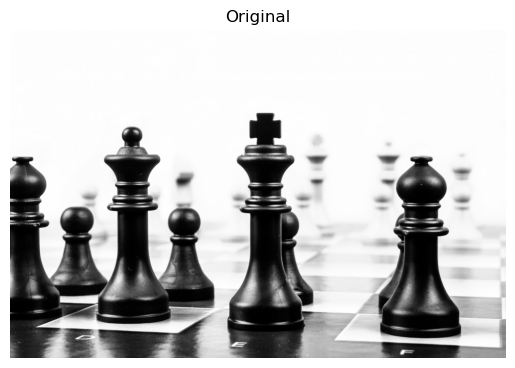

In [155]:
#show the original
plt.imshow(chess, cmap="gray")
plt.title('Original')
plt.axis('off')
plt.show()

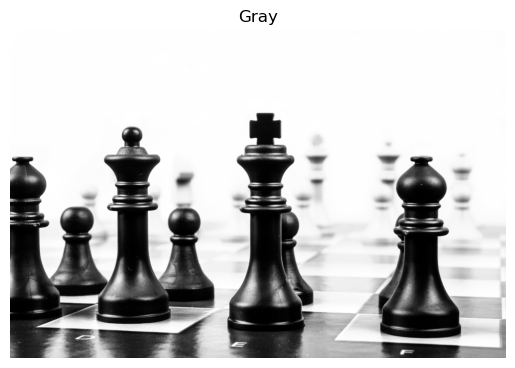

In [156]:
#show the gray one
plt.imshow(g_chess, cmap="gray")
plt.title('Gray')
plt.axis('off')
plt.show()

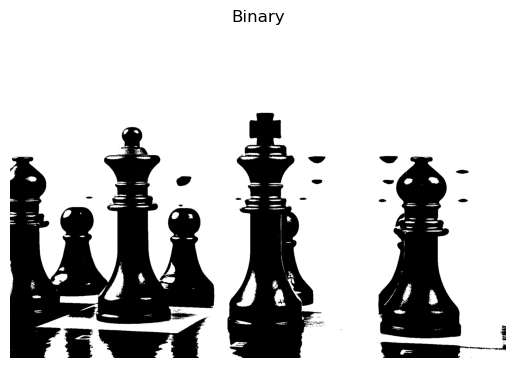

In [157]:
#show the binary one
plt.imshow(binary_chess, cmap="gray")
plt.title('Binary')
plt.axis('off')
plt.show()

Show the 3 results together:

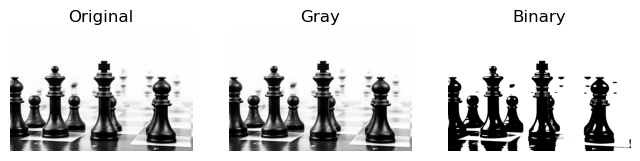

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

ax[0].imshow(chess)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(g_chess, cmap='gray')
ax[1].set_title('Gray')
ax[1].axis('off')

ax[2].imshow(binary_chess, cmap='gray')
ax[2].set_title('Binary')
ax[2].axis('off')

plt.show()

    2. When the background isn't that obvious

In [159]:
from skimage.filters import threshold_otsu, threshold_local
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

In [160]:
txt=plt.imread("nas.jpg")
g_txt= color.rgb2gray(txt)

Global thresholding

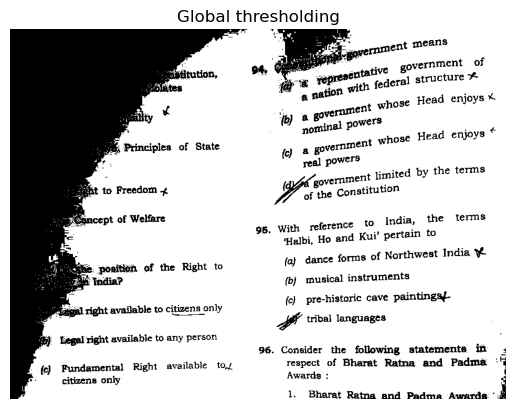

In [161]:
global_thresh = threshold_otsu(g_txt)
binary_global_txt = g_txt > global_thresh
plt.imshow(binary_global_txt, cmap="gray")
plt.title('Global thresholding')
plt.axis('off')
plt.show()

Local thresholding

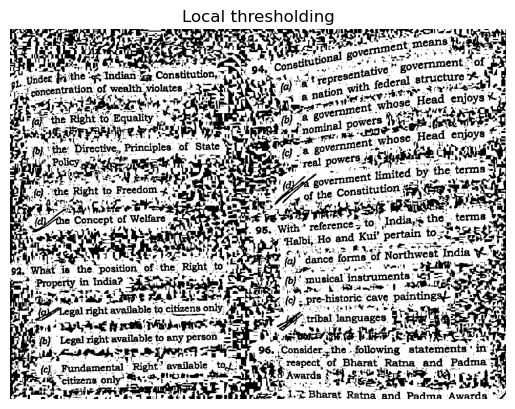

In [162]:
block_size = 35
local_thresh = threshold_local(g_txt, block_size=block_size, method='gaussian')
binary_local = g_txt > local_thresh
plt.imshow(binary_local, cmap="gray")
plt.title('Local thresholding')
plt.axis('off')
plt.show()

4 in 1

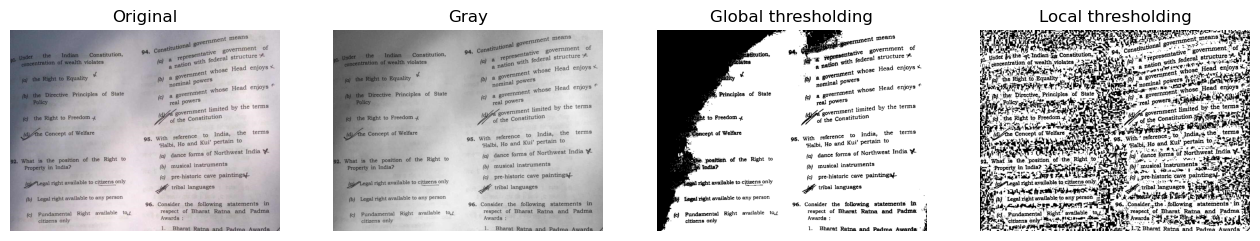

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

ax[0].imshow(txt)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(g_txt, cmap='gray')
ax[1].set_title('Gray')
ax[1].axis('off')

ax[2].imshow(binary_global_txt, cmap='gray')
ax[2].set_title('Global thresholding')
ax[2].axis('off')

ax[3].imshow(binary_local, cmap='gray')
ax[3].set_title('Local thresholding')
ax[3].axis('off')

plt.show()

    3. Trying others methods

In [164]:
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


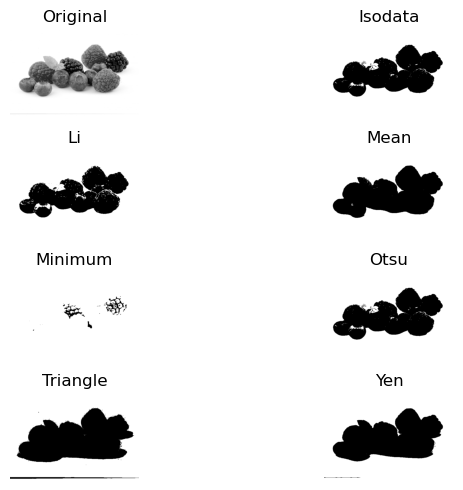

In [165]:
fruit= plt.imread("fruit.jpg")
g_f= rgb2gray(fruit)
result= try_all_threshold(g_f)

    4. Apply the appropriate thresholding

In [166]:
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold
from skimage.color import rgb2gray
import matplotlib.pyplot as plt 

In [167]:
sh= plt.imread("shapes.jpg")
#Turn the image to grayscale
g_sh= rgb2gray(sh)
# obtain optimal threshold using Otsu method
thresh = filters.threshold_otsu(g_sh)
#Obtain the binary image by applying thresholding
binary_img = g_sh > thresh